<a href="https://colab.research.google.com/github/Madhusudan3223/livefakeguard-fake-news-detection/blob/main/LiveFakeGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛡️ LiveFakeGuard: Real-Time Fake News Detection with NewsAPI + Machine Learning

🚀 **Project Type:** End-to-End ML + Streamlit Web App  
📊 **Goal:** Detect whether live news headlines are **Fake** or **Real** using a trained ML model  
🌐 **Tech Stack:** Python, Scikit-learn, NewsAPI, Streamlit, Google Colab  
🔗 **Live App:** [LiveFakeGuard Streamlit App](https://livefakeguard-fake-news-detection-eknyx8uixfzgbqsyuzi7zy.streamlit.app)

---

## 📌 Project Summary

- 🔍 **Fetches live news headlines** using NewsAPI
- 🧹 **Cleans and processes** text using a TF-IDF vectorizer
- 🧠 Uses a **trained Logistic Regression model** to detect fake/real
- 📊 **Displays results** in a clean, interactive UI (title, prediction, link)
- 📁 Allows **CSV download** of classified news
- 🔑 API key input is secure (user-provided, not hardcoded)

---

## 🧠 Model Files
- `fake_news_model_v2.pkl` — trained ML model
- `tfidf_vectorizer_v2.pkl` — TF-IDF transformer

---

## ✅ How to Use (In Colab)
1. Upload the two `.pkl` files
2. Paste My NewsAPI key
3. Run the cell to fetch news, predict, and see results
4. Optionally download the CSV

-

### 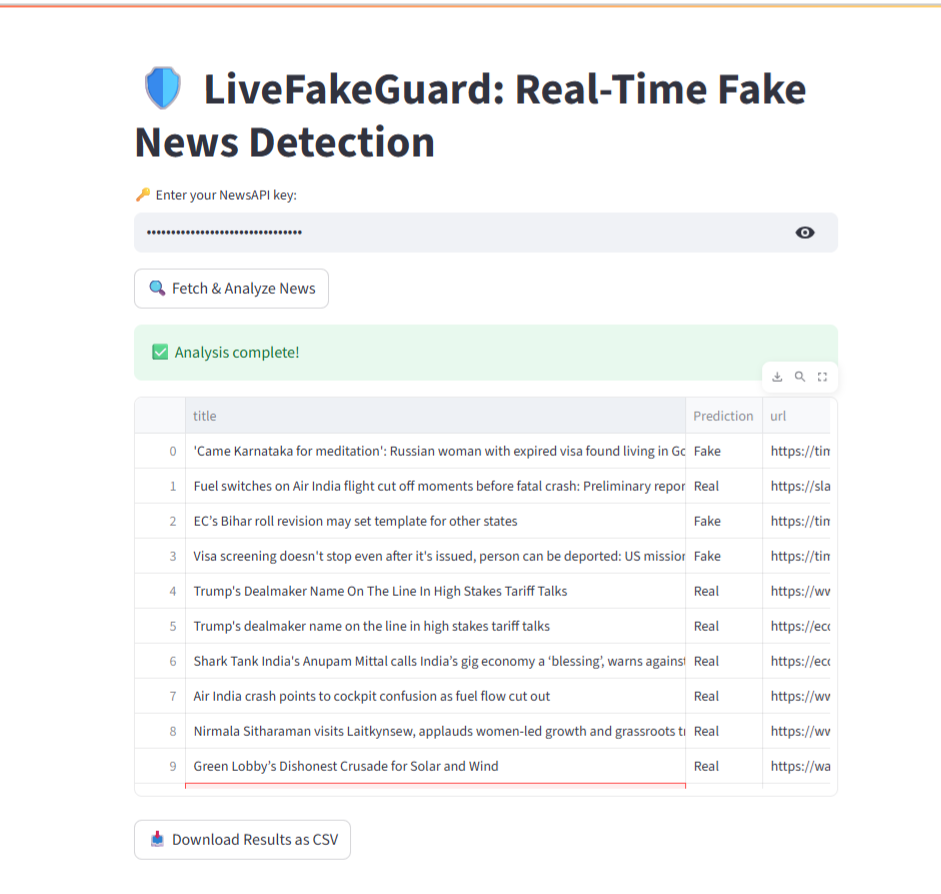

---

## 🙋‍♂️ How Can Others Use This App?

Anyone can try the LiveFakeGuard app in 3 simple steps:

### 🔗 1. Visit the Live App:
👉 [https://livefakeguard-fake-news-detection.streamlit.app](https://livefakeguard-fake-news-detection.streamlit.app)

### 🔐 2. Get a NewsAPI Key (Free)
- Go to [https://newsapi.org](https://newsapi.org)
- Sign up and get your personal API key

### 🧪 3. Use the App
- Paste the API key in the input field
- Click **"🔍 Fetch & Analyze News"**
- The app will:
  - Fetch real-time news headlines
  - Predict if they are **Fake** or **Real**
  - Let you **download the results** as CSV

> 🛡️ This keeps your key secure and avoids public abuse or quota exhaustion.

---

✅ No coding needed  
✅ No install required  
✅ Works from phone or browser


### 🔍  Import Libraries and Fetch Real-Time News

This cell:
- Imports required libraries (`requests`, `pandas`)
- Gets your NewsAPI key securely from Colab's `userdata`
- Fetches the latest 20 English-language news articles about **India** using the NewsAPI
- Stores the data as a Pandas DataFrame for further analysis


In [5]:
import requests
import pandas as pd
from google.colab import userdata

#  API key
API_KEY = userdata.get('newsapi')

# ✅ Define the search query parameters
params = {
    'q': 'India',        # Fetch news related to India
    'language': 'en',    # English articles
    'pageSize': 20,      # Max articles
    'sortBy': 'publishedAt',  # Latest news first
    'apiKey': API_KEY
}

# API endpoint for keyword-based search
url = 'https://newsapi.org/v2/everything'

# Fetch the data
response = requests.get(url, params=params)
data = response.json()

# Debug info
print("Status:", data.get("status"))
print("Total Results:", data.get("totalResults"))

# Convert to DataFrame
articles = data.get('articles', [])
df = pd.DataFrame([{
    'title': article['title'],
    'description': article['description'],
    'content': article['content'],
    'url': article['url']
} for article in articles])

df.head()


Status: ok
Total Results: 23673


,title,description,content,url
0,Air India crash points to cockpit confusion as...,Investigators hope to answer one central quest...,The Air India jetliner that crashed on June 12...,https://www.japantimes.co.jp/news/2025/07/13/w...
1,"Nirmala Sitharaman visits Laitkynsew, applauds...",Union Finance and Corporate Affairs Minister N...,"Syllad | The Rising MeghalayaJuly 13, 2025\r\n...",https://www.syllad.com/nirmala-sitharaman-visi...
2,Green Lobby’s Dishonest Crusade for Solar and ...,LCOE purports to present an apples-to-apples c...,"By Vijay Jayaraj\r\nYou wake up to an alarm, f...",https://wattsupwiththat.com/2025/07/12/green-l...
3,Dying for a transplant,"In 2019, British-Nigerian comedian Emmanuel So...","In 2019, British-Nigerian comedian Emmanuel So...",https://www.bbc.co.uk/programmes/p0lpl32q
4,Nepal’s real food crisis isn’t production — it...,Every harvest season in Nepal carries both joy...,Every harvest season in Nepal carries both joy...,https://english.khabarhub.com/2025/13/484966/


### 📄  Raw News DataFrame

This displays the first few rows of the news articles fetched from NewsAPI.  
Each row contains the article's:
- `title` (headline)
- `description` (short summary)
- `content` (full content)
- `url` (link to the original article)

We'll clean and analyze this data in the next steps.


In [6]:
df

,title,description,content,url
0,Air India crash points to cockpit confusion as...,Investigators hope to answer one central quest...,The Air India jetliner that crashed on June 12...,https://www.japantimes.co.jp/news/2025/07/13/w...
1,"Nirmala Sitharaman visits Laitkynsew, applauds...",Union Finance and Corporate Affairs Minister N...,"Syllad | The Rising MeghalayaJuly 13, 2025\r\n...",https://www.syllad.com/nirmala-sitharaman-visi...
2,Green Lobby’s Dishonest Crusade for Solar and ...,LCOE purports to present an apples-to-apples c...,"By Vijay Jayaraj\r\nYou wake up to an alarm, f...",https://wattsupwiththat.com/2025/07/12/green-l...
3,Dying for a transplant,"In 2019, British-Nigerian comedian Emmanuel So...","In 2019, British-Nigerian comedian Emmanuel So...",https://www.bbc.co.uk/programmes/p0lpl32q
4,Nepal’s real food crisis isn’t production — it...,Every harvest season in Nepal carries both joy...,Every harvest season in Nepal carries both joy...,https://english.khabarhub.com/2025/13/484966/
5,"Ahmedabad plane crash: Emotional effect real, ...",Following the release of the preliminary repor...,Divyanka Tripathi Serves Ethnic Elegance in Style,https://timesofindia.indiatimes.com/india/ahme...
6,Vitrum Studio’s Legacy in Glass and Giving,"In 1957, a writer in The Times of India made a...",Divyanka Tripathi Serves Ethnic Elegance in Style,https://timesofindia.indiatimes.com/city/mumba...
7,AI171 preliminary probe: 2018 report flagged f...,A preliminary report on the Air India flight 1...,Divyanka Tripathi Serves Ethnic Elegance in Style,https://timesofindia.indiatimes.com/india/ai17...
8,Sweat equity! Corporate India invests in workp...,Indian companies are increasingly incorporatin...,New Delhi: India Inc is increasingly game for ...,https://economictimes.indiatimes.com/news/comp...
9,Daily Hacker News for 2025-07-12,The 10 highest-rated articles on\nHacker News\...,The 10 highest-rated articles on\r\nHacker New...,https://www.daemonology.net/hn-daily/2025-07-1...


### 🧹  Clean and Preprocess the News Text

This step combines the `title` and `content` fields and cleans the resulting text by:
- Converting to lowercase
- Removing URLs
- Removing punctuation and numbers
- Removing extra spaces

The cleaned output is stored in a new column called `clean_text`.

We'll use this cleaned text to make fake/real predictions in the next step.


In [7]:
import re

# Combine title and content into one text column
df['text'] = df['title'].fillna('') + ' ' + df['content'].fillna('')

# Function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# View cleaned text
df[['title', 'clean_text']].head()


,title,clean_text
0,Air India crash points to cockpit confusion as...,air india crash points to cockpit confusion as...
1,"Nirmala Sitharaman visits Laitkynsew, applauds...",nirmala sitharaman visits laitkynsew applauds ...
2,Green Lobby’s Dishonest Crusade for Solar and ...,green lobbys dishonest crusade for solar and w...
3,Dying for a transplant,dying for a transplant in britishnigerian come...
4,Nepal’s real food crisis isn’t production — it...,nepals real food crisis isnt production its pr...


### 🧠  Load Trained Model & Predict Fake or Real News

This step:
- Loads the trained Logistic Regression model and TF-IDF vectorizer from `.pkl` files
- Transforms the cleaned news text into numerical features
- Predicts whether each news headline is **Fake** or **Real**
- Stores the result in a new column called `label`


In [12]:
from google.colab import files
uploaded = files.upload()  # Upload model.pkl and vectorizer.pkl


Saving tfidf_vectorizer_v2.pkl to tfidf_vectorizer_v2 (1).pkl
Saving fake_news_model_v2.pkl to fake_news_model_v2 (1).pkl


### 🧠  Load Model and Vectorizer

Here we load the pre-trained:
- **TF-IDF Vectorizer** (`tfidf_vectorizer_v2.pkl`)
- **Logistic Regression Model** (`fake_news_model_v2.pkl`)

These files are required to convert the cleaned news text into features and classify them as **Fake** or **Real**.


In [17]:
import joblib

# Try loading using joblib
vectorizer = joblib.load('tfidf_vectorizer_v2.pkl')
model = joblib.load('fake_news_model_v2.pkl')

print("✅ Model and Vectorizer loaded using joblib!")


✅ Model and Vectorizer loaded using joblib!


### 💾 (Optional) Save Trained Model and Vectorizer

This step saves the trained:
- **Logistic Regression model** → `fake_news_model_v2.pkl`
- **TF-IDF vectorizer** → `tfidf_vectorizer_v2.pkl`

These `.pkl` files can be reused for:
- Predictions in this notebook
- Deployment in a web app (e.g., Streamlit)
- Sharing the model without retraining


In [18]:
import pickle
# Save model
with open('fake_news_model_v2.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('tfidf_vectorizer_v2.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


### 🧠 Predict Fake or Real News Labels

In this step:
- The cleaned news headlines are **transformed into vectors** using the preloaded TF-IDF vectorizer.
- The trained ML model predicts whether each article is **Fake (0)** or **Real (1)**.
- The results are added as a new column `label` with readable values: `"Fake"` or `"Real"`.

The output shows the top 10 headlines with their predicted labels.


In [19]:
# Transform live news into vectors
X_live = vectorizer.transform(df['clean_text'])

# Predict using the model
predictions = model.predict(X_live)

# Attach predictions to the original DataFrame
df['prediction'] = predictions
df['label'] = df['prediction'].apply(lambda x: 'Real' if x == 1 else 'Fake')

# Show results
df[['title', 'label', 'url']].head(10)


,title,label,url
0,Air India crash points to cockpit confusion as...,Real,https://www.japantimes.co.jp/news/2025/07/13/w...
1,"Nirmala Sitharaman visits Laitkynsew, applauds...",Real,https://www.syllad.com/nirmala-sitharaman-visi...
2,Green Lobby’s Dishonest Crusade for Solar and ...,Real,https://wattsupwiththat.com/2025/07/12/green-l...
3,Dying for a transplant,Fake,https://www.bbc.co.uk/programmes/p0lpl32q
4,Nepal’s real food crisis isn’t production — it...,Real,https://english.khabarhub.com/2025/13/484966/
5,"Ahmedabad plane crash: Emotional effect real, ...",Fake,https://timesofindia.indiatimes.com/india/ahme...
6,Vitrum Studio’s Legacy in Glass and Giving,Fake,https://timesofindia.indiatimes.com/city/mumba...
7,AI171 preliminary probe: 2018 report flagged f...,Real,https://timesofindia.indiatimes.com/india/ai17...
8,Sweat equity! Corporate India invests in workp...,Real,https://economictimes.indiatimes.com/news/comp...
9,Daily Hacker News for 2025-07-12,Fake,https://www.daemonology.net/hn-daily/2025-07-1...


### 📥 Export Predictions to CSV

This step saves the results (news title, predicted label, and source URL)  
into a file named: `live_news_predictions.csv`.

📁 The exported file can be:
- Downloaded from Colab
- Shared with others
- Used in reports or dashboards


In [20]:
df[['title', 'label', 'url']].to_csv('live_news_predictions.csv', index=False)


### ⬇️  Download the CSV File

This cell allows you to **download** the generated `live_news_predictions.csv` file  
directly to your local system from Google Colab.


In [21]:
from google.colab import files
files.download('live_news_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>